In [2]:
import numpy as np
import pandas as pd
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from pandas.tools import plotting
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### Encode Categoric Variable

In [3]:
nama = ['Brian','Joe','Sarah','Julia']
gender = ['Male','Male','Female','Female']
marital = ['Married','Single','Married','Single']

In [4]:
my_dict = {'nama':nama, 'gender':gender, 'marital':marital}

In [5]:
#tanpa ordereddict
employee = pd.DataFrame(my_dict)
employee

,gender,marital,nama
0,Male,Married,Brian
1,Male,Single,Joe
2,Female,Married,Sarah
3,Female,Single,Julia


In [6]:
#pake ordereddict
employee = pd.DataFrame(OrderedDict(my_dict))
employee

,nama,gender,marital
0,Brian,Male,Married
1,Joe,Male,Single
2,Sarah,Female,Married
3,Julia,Female,Single


#### Encoding 1, with drop_first=False (default)

In [7]:
employee2 = pd.get_dummies(employee, columns=['gender','marital'])

In [8]:
employee2

,nama,gender_Female,gender_Male,marital_Married,marital_Single
0,Brian,0,1,1,0
1,Joe,0,1,0,1
2,Sarah,1,0,1,0
3,Julia,1,0,0,1


#### encoding 2, with drop_first=True

In [9]:
employee3 = pd.get_dummies(employee, columns=['gender','marital'], drop_first=True)

In [10]:
employee3

,nama,gender_Male,marital_Single
0,Brian,1,0
1,Joe,1,1
2,Sarah,0,0
3,Julia,0,1


### Case 1

In [11]:
predicted = [1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
actual = [1, 0, 1, 1, 0, 1, 1, 1, 0, 0]

In [12]:
my_dict = {'predicted':predicted, 'actual':actual}

In [13]:
predict = pd.DataFrame(OrderedDict(my_dict))
predict

,predicted,actual
0,1,1
1,1,0
2,0,1
3,0,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


In [14]:
print(classification_report(actual, predicted))

             precision    recall  f1-score   support

          0       0.60      0.75      0.67         4
          1       0.80      0.67      0.73         6

avg / total       0.72      0.70      0.70        10



In [15]:
# Build Confusion Matrix
cm = confusion_matrix(actual,predicted)

In [16]:
cm

array([[3, 1],
       [2, 4]], dtype=int64)

In [17]:
total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

In [18]:
print('Confusion Matrix : \n', cm)
print('Accuracy :', accuracy)
print('sensitivity :', sensitivity)
print('specificity :', specificity)

Confusion Matrix : 
 [[3 1]
 [2 4]]
Accuracy : 0.7
sensitivity : 0.6666666666666666
specificity : 0.75


#### Exercise

In [19]:
predicted2 = ['T','T','T','F','F','T','T','T','F','F']
actual2 = ['T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F']

In [20]:
my_dict = {'predicted':predicted2, 'actual':actual2}

In [21]:
predict2 = pd.DataFrame(OrderedDict(my_dict))
predict2

,predicted,actual
0,T,T
1,T,T
2,T,F
3,F,F
4,F,F
5,T,T
6,T,T
7,T,F
8,F,F
9,F,F


In [22]:
print(classification_report(actual2, predicted2))

             precision    recall  f1-score   support

          F       1.00      0.67      0.80         6
          T       0.67      1.00      0.80         4

avg / total       0.87      0.80      0.80        10



In [23]:
cm2 = confusion_matrix(actual2,predicted2)

In [24]:
total = sum(sum(cm2))
accuracy = (cm2[0,0]+cm2[1,1])/total
sensitivity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
specificity = cm2[0,0]/(cm2[0,0]+cm2[0,1])

In [25]:
print('Confusion Matrix : \n', cm2)
print('Accuracy :', accuracy)
print('sensitivity :', sensitivity)
print('specificity :', specificity)

Confusion Matrix : 
 [[4 2]
 [0 4]]
Accuracy : 0.8
sensitivity : 1.0
specificity : 0.6666666666666666


In [26]:
# accuracy_score(actual2,predicted2)

In [27]:
# import sklearn.metrics

#### Excerise 2

In [28]:
predicted3 = ['F', 'F', 'F', 'F','F', 'F', 'F', 'F','F', 'F', 'F', 'F']
actual3 = ['T', 'F', 'F', 'F','F', 'F', 'F', 'F','F', 'F', 'F', 'F']

In [29]:
my_dict = {'predicted':predicted3, 'actual':actual3}

In [30]:
predict3 = pd.DataFrame(OrderedDict(my_dict))

In [31]:
predict3

,predicted,actual
0,F,T
1,F,F
2,F,F
3,F,F
4,F,F
5,F,F
6,F,F
7,F,F
8,F,F
9,F,F


In [32]:
print(classification_report(actual3, predicted3))

             precision    recall  f1-score   support

          F       0.92      1.00      0.96        11
          T       0.00      0.00      0.00         1

avg / total       0.84      0.92      0.88        12



C:\Users\nourma059258\AppData\Local\Continuum\miniconda2\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

### Predict customer default of credit card service from a bank

In [90]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

In [35]:
train.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
0,1,30000.0,1,1,2,40,24607.0,24430.0,23881.0,0
1,2,20000.0,1,1,2,41,17040.0,16474.0,17203.0,0
2,3,20000.0,1,1,2,36,17332.0,18600.0,17947.0,0
3,4,20000.0,1,1,2,35,2003.0,2948.0,3372.0,0
4,5,170000.0,1,1,2,38,171465.0,145196.0,110163.0,0


In [36]:
train.describe()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,50720.634827,48815.920662,46471.030556,0.399158
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,73365.449060,70753.129768,68182.984755,0.489740
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,-165580.000000,-69777.000000,-61506.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,3491.000000,2997.000000,2550.000000,0.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,21943.000000,20987.000000,19954.000000,0.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,65903.000000,62725.000000,59111.000000,1.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,746814.000000,646770.000000,693131.000000,1.000000


In [37]:
train.isnull().sum()

ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
TARGET       0
dtype: int64

In [38]:
print(train.nunique(), '\n')
print(train.shape, '\n')
print(train.dtypes, '\n')


ID           16625
LIMIT_BAL       76
MARRIAGE         3
EDUCATION        4
SEX              2
AGE             52
BILL_AMT1    13364
BILL_AMT2    13201
BILL_AMT3    12939
TARGET           2
dtype: int64 

(16625, 10) 

ID             int64
LIMIT_BAL    float64
MARRIAGE       int64
EDUCATION      int64
SEX            int64
AGE            int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
TARGET         int64
dtype: object 



In [39]:
print(train.groupby('TARGET').describe()["AGE"])
print('\n\n')
print(train.groupby('TARGET').describe()["LIMIT_BAL"])

         count       mean        std   min   25%   50%   75%   max
TARGET                                                            
0       9989.0  41.806988   6.742933  26.0  37.0  40.0  46.0  67.0
1       6636.0  45.732670  10.740157  20.0  36.0  47.0  53.0  72.0



         count           mean            std      min      25%       50%  \
TARGET                                                                     
0       9989.0  178081.489639  131761.930824  10000.0  70000.0  150000.0   
1       6636.0  126791.742013  106722.775190      0.0  50000.0   60000.0   

             75%       max  
TARGET                      
0       250000.0  800000.0  
1       190000.0  500000.0  


In [40]:
# train.plot.bar(stacked = True, figsize=(8,4))

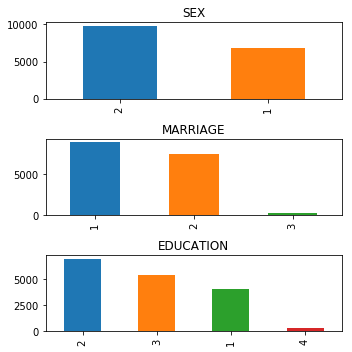

In [41]:
plt.figure(figsize=(5,5))
plt.subplot(3,1,1)
train['SEX'].value_counts().plot(kind='bar')
plt.title("SEX")

plt.subplot(3,1,2)
train['MARRIAGE'].value_counts().plot(kind='bar')
plt.title("MARRIAGE")

plt.subplot(3,1,3)
train['EDUCATION'].value_counts().plot(kind='bar')
plt.title("EDUCATION")

plt.tight_layout()
plt.show()

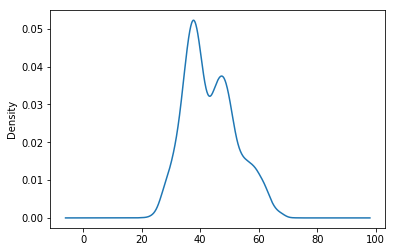

In [42]:
train['AGE'].plot.density()

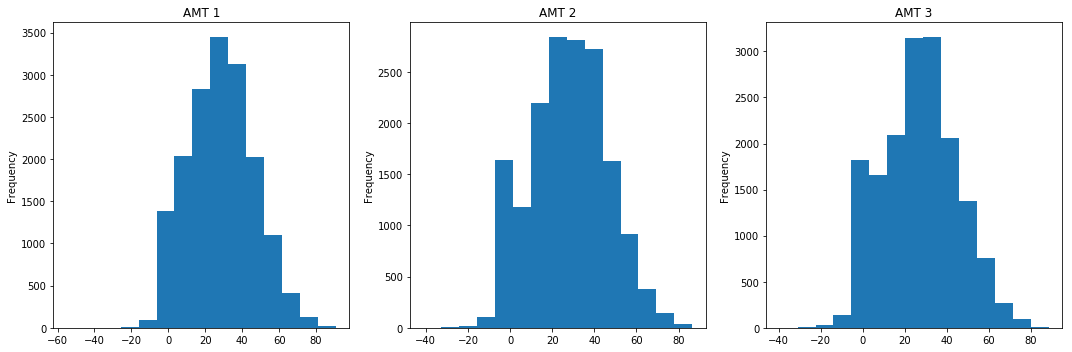

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
train['BILL_AMT1'].apply(np.cbrt).plot.hist(bins = 15)
plt.title("AMT 1")

plt.subplot(1,3,2)
train['BILL_AMT2'].apply(np.cbrt).plot.hist(bins = 15)
plt.title("AMT 2")

plt.subplot(1,3,3)
train['BILL_AMT3'].apply(np.cbrt).plot.hist(bins = 15)
plt.title("AMT 3")

plt.tight_layout()
plt.show()

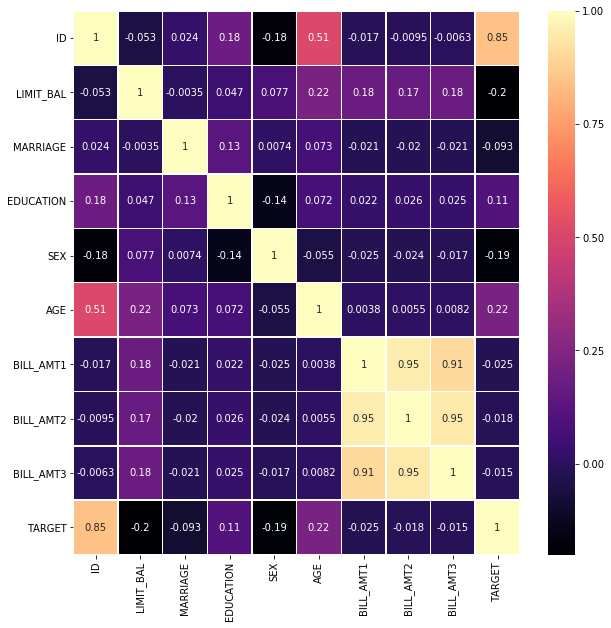

In [44]:
corr = train.corr()
df = pd.DataFrame(train.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df, cmap='magma', linewidths=0.5, annot=True)
plt.show()

In [45]:
iknowyou = train.groupby(['LIMIT_BAL','TARGET']).count().sort_values(by='ID', ascending=False)['ID']

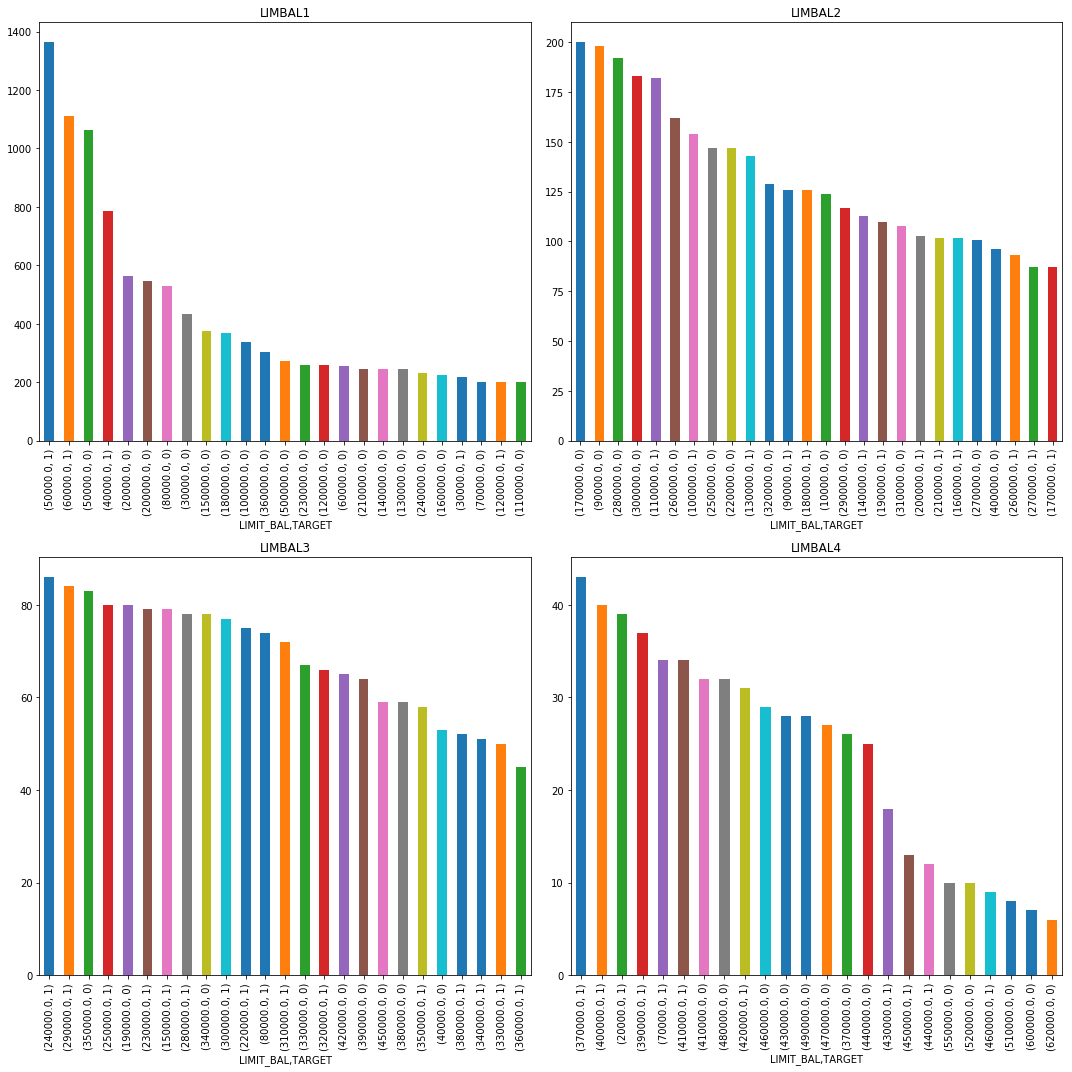

In [46]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
iknowyou[:25].plot(kind='bar', stacked=True)
plt.title("LIMBAL1")

plt.subplot(2,2,2)
iknowyou[25:51].plot(kind='bar', stacked=True)
plt.title("LIMBAL2")

plt.subplot(2,2,3)
iknowyou[51:76].plot(kind='bar', stacked=True)
plt.title("LIMBAL3")

plt.subplot(2,2,4)
iknowyou[76:100].plot(kind='bar', stacked=True)
plt.title("LIMBAL4")

plt.tight_layout()
plt.show()

In [129]:
traindum = pd.get_dummies(train, columns=['SEX','MARRIAGE','EDUCATION'], drop_first=bool)

In [130]:
traindum['MEAN AMT']=(traindum['BILL_AMT1']+traindum['BILL_AMT2']+traindum['BILL_AMT3'])/3

In [131]:
traindum['OVER CREDIT']=np.where(traindum['LIMIT_BAL']-traindum['MEAN AMT'] > 0 , 0, 1)

In [132]:
traindum[traindum['OVER CREDIT']==1]
#traindum

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET,SEX_2,MARRIAGE_2,MARRIAGE_3,EDUCATION_2,EDUCATION_3,EDUCATION_4,MEAN AMT,OVER CREDIT
0,1,30000.0,40,24607.0,24430.0,23881.0,0,1,0,0,0,0,0,24306.000000,0
1,2,20000.0,41,17040.0,16474.0,17203.0,0,1,0,0,0,0,0,16905.666667,0
2,3,20000.0,36,17332.0,18600.0,17947.0,0,1,0,0,0,0,0,17959.666667,0
3,4,20000.0,35,2003.0,2948.0,3372.0,0,1,0,0,0,0,0,2774.333333,0
4,5,170000.0,38,171465.0,145196.0,110163.0,0,1,0,0,0,0,0,142274.666667,0
5,6,20000.0,40,16500.0,17012.0,18181.0,0,1,0,0,0,0,0,17231.000000,0
6,7,200000.0,32,157222.0,160320.0,162140.0,0,1,0,0,0,0,0,159894.000000,0
7,8,370000.0,37,47269.0,43531.0,59801.0,0,1,0,0,0,0,0,50200.333333,0
8,9,160000.0,39,106643.0,89397.0,90348.0,0,1,0,0,0,0,0,95462.666667,0
9,10,30000.0,36,25826.0,27274.0,25744.0,0,1,0,0,0,0,0,26281.333333,0


In [134]:
traindum = traindum.drop(['MARRIAGE_3','BILL_AMT2','BILL_AMT3','EDUCATION_4','MEAN AMT'], axis=1)
traindum

ValueError: labels ['MARRIAGE_3' 'BILL_AMT2' 'BILL_AMT3' 'EDUCATION_4' 'MEAN AMT'] not contained in axis

In [52]:
pd.crosstab(train['EDUCATION'],train['TARGET'],margins=True).style.background_gradient(cmap='summer_r')

TARGET,0,1,All
EDUCATION,,,
1,2792,1237,4029
2,4095,2830,6925
3,2923,2436,5359
4,179,133,312
All,9989,6636,16625


## Logistic Regression

#### train test split

In [135]:
x=traindum.drop(['ID','TARGET'],1)
y=traindum['TARGET']
train_x , test_x, train_y, test_y = train_test_split(x,y, test_size=0.2,random_state=123)
#traindum

In [136]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train_x, train_y) #ngefit bikin model
logregpred = logreg.predict(test_x)

In [137]:
sum(test_y==logregpred)/len(test_y)

0.595187969924812

In [138]:
print('Intercept : \n', logreg.intercept_)
coef = pd.concat([pd.DataFrame(x.columns),
                 pd.DataFrame(np.transpose(logreg.coef_))],
                axis = 1)
coef

Intercept : 
 [2.16881128e-05]


,0,0
0,LIMIT_BAL,-3.678887e-06
1,AGE,3.696413e-03
2,BILL_AMT1,1.120909e-07
3,SEX_2,-9.050999e-05
4,MARRIAGE_2,-4.942490e-05
5,EDUCATION_2,1.227812e-05
6,EDUCATION_3,5.764747e-05
7,OVER CREDIT,6.410524e-05


In [139]:
decisiontree = DecisionTreeClassifier(random_state = 123)
decisiontree.fit(train_x, train_y)
dtpred = decisiontree.predict(test_x)

In [140]:
cm1 = confusion_matrix(test_y,dtpred)

total1=sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print('Confusion Matrix : \n', cm1)
print('Accuracy : ', accuracy1)
print('Sensitivity : ', sensitivity1 )
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1747  305]
 [ 299  974]]
Accuracy :  0.8183458646616542
Sensitivity :  0.7651217596229379
Specificity :  0.851364522417154
